# Taller de Segmentación RFM

En este notebook aprenderemos a realizar una segmentación RFM completa paso a paso. Se utilizarán datos de transacciones y se explicará cada parte del proceso. ¡Sigue las instrucciones y ejecuta cada celda para ir avanzando!

In [142]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
!unzip "Case 1_Online Retail.xlsx - Online Retail.csv.zip"

--2025-04-03 01:26:42--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip [following]
--2025-04-03 01:26:42--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## 1. Preparación de Datos

Primero, cargaremos la librería necesaria y prepararemos los datos. Para este ejemplo, vamos a simular un DataFrame similar a una tabla de transacciones.

Ejecuta la siguiente celda y revisa el DataFrame resultante.

In [143]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style='whitegrid')

In [144]:
df = pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


Convierta la variable InvoiceDate en tipo datetime con pd.to_datetime()

In [145]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


## 2. Limpieza y Enriquecimiento de los Datos

En esta sección, eliminamos filas con `CustomerID` nulo (si existieran) y registros con cantidades negativas o cero. Además, crearemos una nueva columna `TotalPrice` que es el producto de `Quantity` y `UnitPrice`.

Eliminar las filas con CustomerID nulo

In [146]:
#Eliminar filas con CustomerID nulo (si existieran)
df = df.dropna(subset=['CustomerID'])

Eliminar registros con Quantity <= 0

In [147]:
#Eliminar registros con cantidades negativas o cero
df = df[df['Quantity'] > 0]

Asegure que Price este en float sino lo esta cambielo usando esto.   df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

¿Que estoy haciendo ?

In [244]:
# Asegure que Price este en float sino lo esta cambielo usando esto. df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",",".")) df["UnitPrice"] = df["UnitPrice"].astype(float)
df["UnitPrice"] = df["UnitPrice"].apply(lambda x: str(x).replace(",", "."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

Crear columna TotalPrice

In [149]:
# Columna TotalPrice que es el producto de Quantity y UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. Cálculo de las Métricas RFM

Calcularemos las siguientes métricas para cada cliente:

- **Recencia (R):** Días transcurridos desde la última compra hasta la fecha de corte.
- **Frecuencia (F):** Número de facturas únicas realizadas por el cliente.
- **Monetario (M):** Total gastado por el cliente.

Primero, definamos la fecha de snapshot (fecha de corte).

Definir la fecha de snapshot (por ejemplo, un día después del último registro)


In [150]:
#Fecha de snapshot (por ejemplo, un día después del último registro)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"La fecha de snapshot es: {snapshot_date}")

La fecha de snapshot es: 2011-12-10 12:50:00


### 3.1 Agrupación por Cliente y Cálculo de R, F y M

Agruparemos el DataFrame por `CustomerID` y calcularemos:

- **Recency:** Días entre el `snapshot_date` y la última `InvoiceDate` de cada cliente.
- **Frecuencia:** Número único de facturas (`InvoiceNo`).
- **Monetario:** Suma de `TotalPrice`.

Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

In [151]:
#Recency: Días entre el snapshot_date y la última InvoiceDate de cada cliente
rfm_recency = df.groupby('CustomerID')['InvoiceDate'].agg(
    lambda x: (snapshot_date - x.max()).days  #Días desde la última compra
).reset_index().rename(columns={'invoice_date': 'recency'})

In [152]:
#Frecuencia: Número único de facturas (InvoiceNo).
rfm_frequency = df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
rfm_frequency.rename(columns={'InvoiceNo': 'frequency'}, inplace=True)

In [153]:
#Monetario: Suma de TotalPrice
rfm_monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_monetary.rename(columns={'TotalPrice': 'monetary'}, inplace=True)

In [154]:
rfm = rfm_recency.merge(rfm_frequency, on='CustomerID').merge(rfm_monetary, on='CustomerID')
rfm.head()

,CustomerID,InvoiceDate_x,InvoiceDate_y,monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [155]:
df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


Renombre las Columnas de manera correspondiente

In [156]:
# Renombre las columnas
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()


,CustomerID,InvoiceDate_x,InvoiceDate_y,monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [157]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


## 4. Asignación de Puntajes RFM

Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para **Recency** asignaremos de forma inversa (más bajo es mejor) y para **Frecuencia** y **Monetario** de forma directa.


Asignar puntajes usando pd.qcut
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
Tenga en cuent si encesita duplicates= "drop" en algun momento
Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

In [158]:
rfm['R_score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop') #Puntajes de Recency - Inverso
rfm.head()

,Recency,Frequency,Monetary,R_score
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,7,4310.00,4
12348.0,75,4,1797.24,2
12349.0,19,1,1757.55,3
12350.0,310,1,334.40,1


In [159]:
rfm['F_score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3], duplicates='drop') #Puntajes de Frequency - Directo
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score
CustomerID,,,,,
12346.0,326,1,77183.60,1,1
12347.0,2,7,4310.00,4,3
12348.0,75,4,1797.24,2,2
12349.0,19,1,1757.55,3,1
12350.0,310,1,334.40,1,1


In [167]:
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4], duplicates="drop") #Puntajes de Monetary - Directo
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,7,4310.00,4,3,4,434
12348.0,75,4,1797.24,2,2,4,224
12349.0,19,1,1757.55,3,1,4,314
12350.0,310,1,334.40,1,1,2,112


Cree RFM_Score que sea la concatenacion de texto de los anteriores score

In [168]:
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,7,4310.00,4,3,4,434
12348.0,75,4,1797.24,2,2,4,224
12349.0,19,1,1757.55,3,1,4,314
12350.0,310,1,334.40,1,1,2,112


## 5. Definición de Segmentos

Con los puntajes asignados, podemos definir segmentos de clientes. Por ejemplo, podemos identificar:

- **Champions:** Clientes con puntajes altos en R, F y M (por ejemplo, `R_score >= 3`, `F_score >= 3`, `M_score >= 3`).
- **Loyal Customers:** Clientes leales que compran frecuentemente y tienen un gasto moderado a alto.
- **Potential Loyalist:** Clientes que muestran potencial, pero que aún no alcanzan los niveles de los Champions.
- **At Risk:** Clientes con puntajes bajos en recencia y frecuencia, lo que indica riesgo de abandono.

Puedes personalizar estos criterios según tu caso de negocio.

Ejecuta la siguiente celda para asignar segmentos.
 tiene que aplicarlo en una columna en su df
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [177]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [181]:
# Aplicar la segmentación al DataFrame
rfm['Segment'] = rfm.apply(segment_me, axis=1)
print(rfm.head())

            Recency  Frequency  Monetary R_score F_score M_score RFM_score  \
CustomerID                                                                   
12346.0         326          1  77183.60       1       1       4       114   
12347.0           2          7   4310.00       4       3       4       434   
12348.0          75          4   1797.24       2       2       4       224   
12349.0          19          1   1757.55       3       1       4       314   
12350.0         310          1    334.40       1       1       2       112   

              Segment  
CustomerID             
12346.0       At Risk  
12347.0     Champions  
12348.0       At Risk  
12349.0        Others  
12350.0       At Risk  


## 6. Visualizaciones

A continuación, crearemos algunas gráficas para visualizar la distribución de las métricas RFM y la cantidad de clientes por segmento.

### 6.1 Histogramas de Recency, Frequency y Monetary

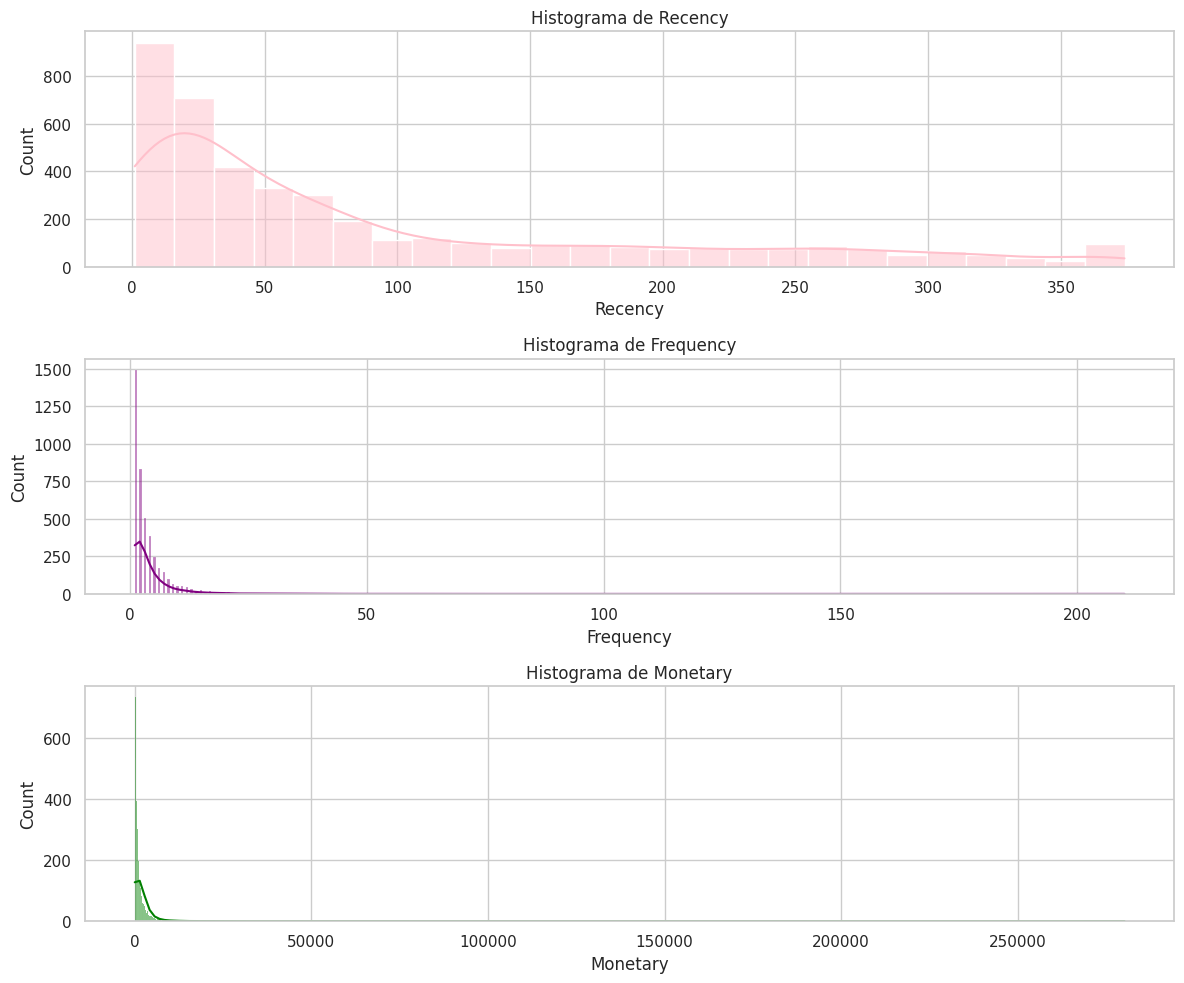

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))


plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], kde=True, color='pink')
plt.title('Histograma de Recency')


plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], kde=True, color='purple')
plt.title('Histograma de Frequency')


plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], kde=True, color='green')
plt.title('Histograma de Monetary')

plt.tight_layout()
plt.show()

### 6.2 Conteo de Clientes por Segmento

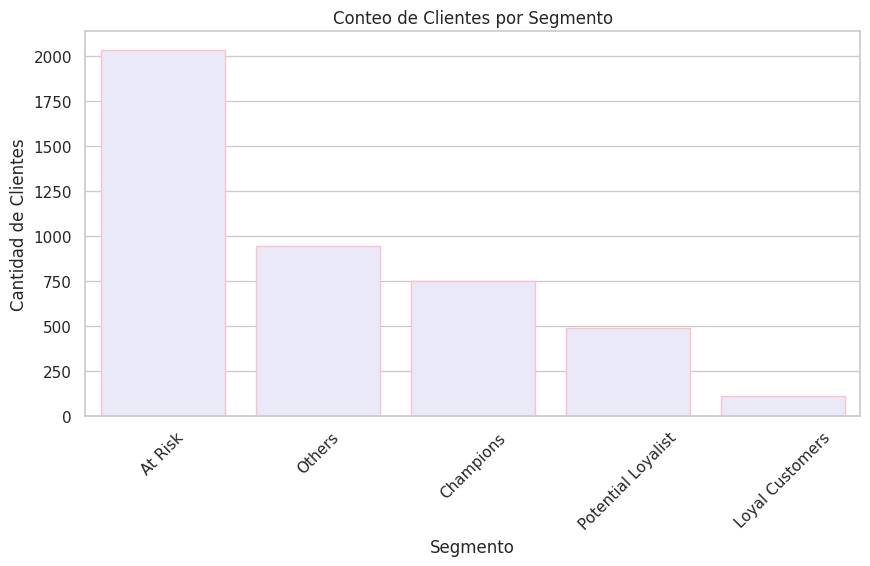

In [234]:
plt.figure(figsize=(10, 5))
sns.countplot(x=rfm['Segment'], order=rfm['Segment'].value_counts().index, color='lavender', edgecolor='pink')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.title('Conteo de Clientes por Segmento')
plt.xticks(rotation=45)
plt.show()

### 6.3 Gráfico de Dispersión: Frequency vs Monetary

Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento.

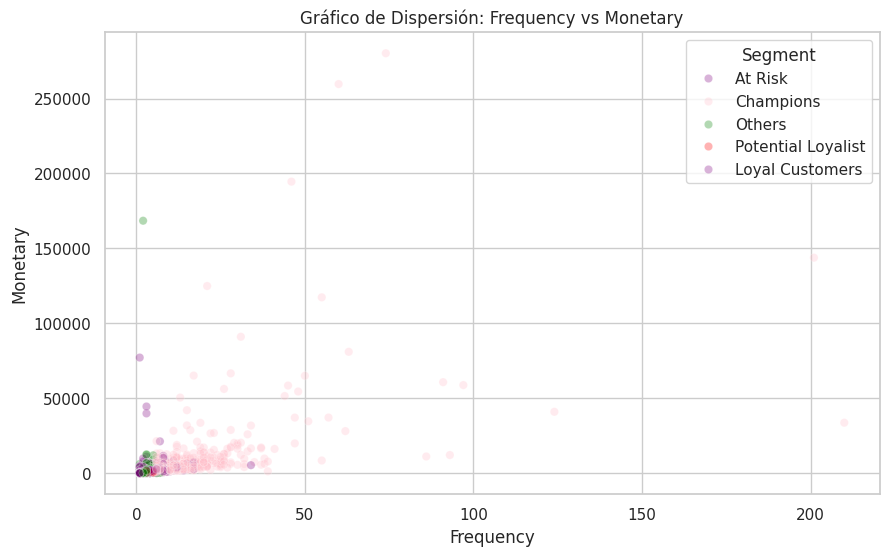

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
color_palette = {'Champions': 'purple', 'Loyal Customer': 'pink', 'Potential Loyalist': 'green', 'At Risk': 'red'}
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=rfm,palette=color_palette.values(), alpha=0.3)
plt.title('Gráfico de Dispersión: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

## 7. Conclusiones y Próximos Pasos

En este taller hemos:

1. **Preparado y limpiado los datos**: Se simuló un DataFrame, se convirtieron las fechas y se creó la columna `TotalPrice`.
2. **Calculado las métricas RFM** para cada cliente.
3. **Asignado puntajes** a cada métrica utilizando cuartiles.
4. **Definido segmentos** de clientes basados en los puntajes.
5. **Visualizado** la distribución de las métricas y los segmentos.

Utiliza estos resultados para diseñar estrategias de marketing específicas para cada segmento (por ejemplo, campañas de retención para los clientes "At Risk" o programas VIP para los "Champions").

¡Felicidades por completar el taller!